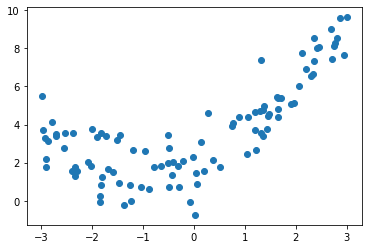

-2.9765409367933353 5.514216910029301
-2.969346967417201 3.705580452575393
-2.9237808177913944 3.2933896886728222
-2.9026769200953435 1.779960375372468
-2.901278541196075 2.1792602661209983
-2.8605822045665765 3.139337760648006
-2.7814027310993916 4.124813644386491
-2.7071232372 3.4800805316734635
-2.6982359929516377 3.3826890690886744
-2.549000736316849 2.7827788621520773
-2.523947238875798 3.544835310996474
-2.4004286320727317 1.5666411896157433
-2.377370855094034 3.536390599862369
-2.33427796807532 1.309334633979678
-2.322854078209752 1.7658559972957897
-2.291201439118561 1.5459778545009613
-2.077956587999959 2.0209283380829235
-2.0284563643177322 1.8465705568672426
-1.993351440946466 3.76082993456727
-1.9093790056926583 3.345544739386082
-1.8517885923720163 0.249148456030734
-1.8426479817564976 -0.08793879471647936
-1.81769863293961 0.8176454686380044
-1.8149810616420101 3.5541441446790323
-1.7985147639931351 1.2348892060343912
-1.726454997911632 3.3987225070125295
-1.6835445333435

In [15]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
class node():
    def __init__(self,x,y):
        self.x = x
        self.y = y

l = list()       
np.random.seed(666)
x = np.random.uniform(-3.0,3.0,size=100)
X = x.reshape(-1,1)
y = 0.5 * x ** 2 + x + 2 + np.random.normal(0,1,size=100)
plt.scatter(x,y)
plt.show()

for i in range(0,len(x)):
    t = node(x[i],y[i])
    l.append(t)

l.sort(key=lambda t:t.x)

for i in range(0,len(x)):
    print(l[i].x,l[i].y)

In [3]:
# 使用线性模型对数据进行拟合
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.score(X,y)

0.4953707811865009

In [4]:
# 可以看到直线拟合的准确度较低，下面使用均方误差作为评价指标来评价拟合程度

from sklearn.metrics import mean_squared_error
y_predict = lin_reg.predict(X)
mean_squared_error(y,y_predict)

3.0750025765636577

[4.83272434 5.65580329 4.69574759 4.98973074 6.27001586 0.89490724
 3.190286   1.10166306 1.39434099 3.73125026 1.96874596 5.08303878
 1.92662974 4.83505834 2.50113276 5.25667487 0.85142358 1.4683702
 1.45746841 2.24026667 0.95521753 4.98665655 2.76913868 1.95303221
 6.027939   6.42397667 3.87288466 2.30590491 4.16495742 2.68700635
 5.91181847 4.40882956 5.51086675 3.95615406 3.20817512 5.07670047
 2.93840114 1.25255898 5.26076036 2.07846178 1.27646748 3.60937242
 1.7020753  5.5657853  1.91790688 2.37047519 4.03453434 5.98900822
 5.69932899 3.21601918 3.07513226 0.91504664 2.53540312 2.84782974
 5.93817627 5.32342101 5.23896771 3.22731557 5.26552512 3.4807004
 1.86294848 5.88391265 4.93782197 4.66921982 2.29119985 3.28885039
 0.91638111 2.16769576 3.74902886 2.4941538  3.69590615 3.67517664
 1.41634497 3.37840908 6.37154097 5.05049887 4.94216406 5.93554654
 6.33424041 1.95043884 4.91376048 1.74931324 5.78216067 4.39403253
 6.31580592 3.82329649 1.03077831 4.98408237 0.84455839 1.110144

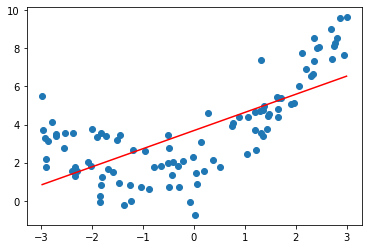

In [7]:
# 绘制拟合结果
y_predict = lin_reg.predict(X)
print(y_predict)
plt.scatter(x,y)
plt.plot(np.sort(x),y_predict[np.argsort(x)],color='r')
plt.show()

In [18]:
# 多项目拟合
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

def PolynomialRegression(degree):
    return Pipeline([('poly',PolynomialFeatures(degree=degree)),('std_scaler',StandardScaler()),('lin_reg',LinearRegression())])

In [20]:
# 使用Pipeline拟合数据，多项式参数设置为 degree=2 进行预测
poly2_reg = PolynomialRegression(degree=2)
poly2_reg.fit(X,y)
y2_predict = poly2_reg.predict(X)

# 比较真实值和预测值的军方误差
mean_squared_error(y,y2_predict)

1.0987392142417856

In [ ]:
# 将模型结果进行拟合
plt.scatter(x,y)
plt.plot(np.sorted(x),y2_predict[np.argsort(x)],color='r')
plt.show()